In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.style as style
import xlsxwriter
import pandas_flavor as pf

In [2]:

file_path = r'C:\Users\fguar\OneDrive\Documentos\VS Code\Python\Docente activo\Encuestas creencias DA 2024 (Responses) - Form Responses 1.csv'
my_data = pd.read_csv (file_path)

In [3]:
variable_names = my_data.columns.tolist()
print(variable_names)

['Timestamp', '¿Cuál es tu comuna de residencia?', '¿Vives en zona urbana o rural?', '¿Qué edad tienes?', '¿Con qué género te identificas?', '¿Cómo te enteraste del programa?', '¿En qué espacio educativo trabajas?', '¿Qué enseñas en tu espacio educativo?', '¿A rango de edades enseñas?', 'I. Por favor indica tu grado de acuerdo a las siguientes afirmaciones que se refieren a tu percepción sobre bienestar y naturaleza. [Me siento parte del ecosistema natural.]', 'I. Por favor indica tu grado de acuerdo a las siguientes afirmaciones que se refieren a tu percepción sobre bienestar y naturaleza. [Me siento más cómodo en la ciudad que en la naturaleza.]', 'I. Por favor indica tu grado de acuerdo a las siguientes afirmaciones que se refieren a tu percepción sobre bienestar y naturaleza. [Suelo emocionarme cuando veo un paisaje hermoso.]', 'I. Por favor indica tu grado de acuerdo a las siguientes afirmaciones que se refieren a tu percepción sobre bienestar y naturaleza. [Me siento agradecido p

In [4]:
# dictionary with full variable names as keys and short labels as values
variable_labels = {
    "¿Cuál es tu comuna de residencia?": "comuna",
    "¿A rango de edades enseñas?": "rango_edades_ensenanza",
    "¿Vives en zona urbana o rural?": "zona",
    "¿Qué edad tienes?": "edad", 
    "¿Con qué género te identificas?": "genero", 
    "¿Cómo te enteraste del programa?": "edad_estu",
    "¿En qué espacio educativo trabajas?": "espacio_educativo",
    "¿Qué enseñas en tu espacio educativo?": "ensenanza",
    "I. Por favor indica tu grado de acuerdo a las siguientes afirmaciones que se refieren a tu percepción sobre bienestar y naturaleza. [Me siento parte del ecosistema natural.]": "I.BYN_1",
    "I. Por favor indica tu grado de acuerdo a las siguientes afirmaciones que se refieren a tu percepción sobre bienestar y naturaleza. [Me siento más cómodo en la ciudad que en la naturaleza.]": "I.BYN_2",
    "I. Por favor indica tu grado de acuerdo a las siguientes afirmaciones que se refieren a tu percepción sobre bienestar y naturaleza. [Suelo emocionarme cuando veo un paisaje hermoso.]": "I.BYN_3",
    "I. Por favor indica tu grado de acuerdo a las siguientes afirmaciones que se refieren a tu percepción sobre bienestar y naturaleza. [Me siento agradecido por los regalos que la naturaleza nos da.]": "I.BYN_4", 
    "I. Por favor indica tu grado de acuerdo a las siguientes afirmaciones que se refieren a tu percepción sobre bienestar y naturaleza. [La naturaleza me hace sentir intranquilo y alerta.]": "I.BYN_5",
    "I. Por favor indica tu grado de acuerdo a las siguientes afirmaciones que se refieren a tu percepción sobre bienestar y naturaleza. [Tengo un lugar especial en la naturaleza que me gusta visitar]" : "I.BYN_6",
    "I. Por favor indica tu grado de acuerdo a las siguientes afirmaciones que se refieren a tu percepción sobre bienestar y naturaleza. [Siento que tengo una conexión especial con un lugar en la naturaleza.]": "I.BYN_7",
    "I. Por favor indica tu grado de acuerdo a las siguientes afirmaciones que se refieren a tu percepción sobre bienestar y naturaleza. [Es normal y parte del progreso que en un lugar natural cambie o tenga que desaparecer.]": "I.BYN_8", 
    "I. Por favor indica tu grado de acuerdo a las siguientes afirmaciones que se refieren a tu percepción sobre bienestar y naturaleza. [Creo que es importante proteger la naturaleza para las generaciones futuras.]": "I.BYN_9",
    "I. Por favor indica tu grado de acuerdo a las siguientes afirmaciones que se refieren a tu percepción sobre bienestar y naturaleza. [No me siento responsable del cuidado de la naturaleza.]": "I.BYN_10",
    "I. Por favor indica tu grado de acuerdo a las siguientes afirmaciones que se refieren a tu percepción sobre bienestar y naturaleza. [Me gusta aprender sobre la naturaleza y cómo funciona.]": "I.BYN_11",
    "II.  Por favor indica tu grado de acuerdo a las siguientes afirmaciones que se refieren a tus percepciones sobre la creatividad y el trabajo en el aula. [Creo que la creatividad abunda entre niños/as y adolescentes de mi espacio educativo.]": "II.CTA_1",
    "II.  Por favor indica tu grado de acuerdo a las siguientes afirmaciones que se refieren a tus percepciones sobre la creatividad y el trabajo en el aula. [Las ideas de mis estudiantes me ayudan a explicar contenidos o desarrollar actividades con mayor riqueza educativa.]": "II.CTA_2",
    "II.  Por favor indica tu grado de acuerdo a las siguientes afirmaciones que se refieren a tus percepciones sobre la creatividad y el trabajo en el aula. [A menudo me veo comentando con colegas o familiares comentarios ingeniosos de mis estudiantes.]": "II.CTA_3",
    "II.  Por favor indica tu grado de acuerdo a las siguientes afirmaciones que se refieren a tus percepciones sobre la creatividad y el trabajo en el aula. [Mi disciplina/asignatura no me permite llevar a cabo actividades creativas con estudiantes.]": "II.CTA_4", 
    "II.  Por favor indica tu grado de acuerdo a las siguientes afirmaciones que se refieren a tus percepciones sobre la creatividad y el trabajo en el aula. [Cuando un estudiante tiene una idea creativa es importante que la comparta con el curso.]": "II.CTA_5",
    "II.  Por favor indica tu grado de acuerdo a las siguientes afirmaciones que se refieren a tus percepciones sobre la creatividad y el trabajo en el aula. [Disfruto cuando un/a estudiante presenta una respuesta o trabajo creativo.]": "II.CTA_6",
    "II.  Por favor indica tu grado de acuerdo a las siguientes afirmaciones que se refieren a tus percepciones sobre la creatividad y el trabajo en el aula. [Las ideas creativas son premiadas en mi clase.]": "II.CTA_7",
    "II.  Por favor indica tu grado de acuerdo a las siguientes afirmaciones que se refieren a tus percepciones sobre la creatividad y el trabajo en el aula. [Prefiero que estudiantes se concentren en las instrucciones las ideas creativas pueden ser disruptivas]": "II.CTA_8",
    "II.  Por favor indica tu grado de acuerdo a las siguientes afirmaciones que se refieren a tus percepciones sobre la creatividad y el trabajo en el aula. [Suelo mencionar la importancia de pensar \"fuera de la caja\" en mis clases.]": "II.CTA_9",
    "III.   Por favor indica tu grado de acuerdo a las siguientes afirmaciones que se refieren a tus percepciones sobre la importancia del arte. [Creo que el arte en sus diversas expresiones es un elemento secundario en desarrollo integral de niños niñas y adolescentes]" : "III.IA_1",
    "III.   Por favor indica tu grado de acuerdo a las siguientes afirmaciones que se refieren a tus percepciones sobre la importancia del arte. [Me gusta dedicar tiempo a asistir a exposiciones de arte y eventos culturales.]": "III.IA_2",
    "III.   Por favor indica tu grado de acuerdo a las siguientes afirmaciones que se refieren a tus percepciones sobre la importancia del arte. [Incluyo actividades artísticas en mis planes de enseñanza.]": "III.IA_3",
    "IV.   Por favor indica tu grado de acuerdo a las siguientes afirmaciones que se refieren a tus percepciones sobre el trabajo colaborativo. [Compartir ideas y soluciones con mis colegas me hace sentir más seguro en mi trabajo.]": "IV.TC_1",
    "IV.   Por favor indica tu grado de acuerdo a las siguientes afirmaciones que se refieren a tus percepciones sobre el trabajo colaborativo. [A veces siento que mis colegas no valoran mis ideas o contribuciones.]": "IV.TC_2",
    "IV.   Por favor indica tu grado de acuerdo a las siguientes afirmaciones que se refieren a tus percepciones sobre el trabajo colaborativo. [Compartir mis conocimientos con otros docentes me ayuda a fortalecer mi disciplina.]": "IV.TC_3", 
    "IV.   Por favor indica tu grado de acuerdo a las siguientes afirmaciones que se refieren a tus percepciones sobre el trabajo colaborativo. [Aprecio cuando otros docentes me dan retroalimentación sobre mi trabajo.]": "IV.TC_4",
    "IV.   Por favor indica tu grado de acuerdo a las siguientes afirmaciones que se refieren a tus percepciones sobre el trabajo colaborativo. [Me gusta participar en proyectos de equipo que involucran a otros docentes y disciplinas.]": "IV.TC_5", 
    "IV.   Por favor indica tu grado de acuerdo a las siguientes afirmaciones que se refieren a tus percepciones sobre el trabajo colaborativo. [Me siento cómodo/a en un ambiente colaborativo donde todos los docentes tienen la oportunidad de participar.]": "IV.TC_6", 
    "IV.   Por favor indica tu grado de acuerdo a las siguientes afirmaciones que se refieren a tus percepciones sobre el trabajo colaborativo. [A veces siento que trabajar con mis colegas me complica más que me ayuda.]": "IV.TC_7",
    "V.   Por favor indica tu grado de acuerdo a las siguientes afirmaciones que se refieren a tus percepciones sobre la capacidad creativa. [Me siento inseguro/a cuando debo enfrentar situaciones que requieren creatividad en el aula.]": "V.CC_1", 
    "V.   Por favor indica tu grado de acuerdo a las siguientes afirmaciones que se refieren a tus percepciones sobre la capacidad creativa. [Siento que puedes generar ideas novedosas en el contexto escolar.]": "V.CC_2",
    "V.   Por favor indica tu grado de acuerdo a las siguientes afirmaciones que se refieren a tus percepciones sobre la capacidad creativa. [Me siento capaz de aplicar soluciones creativas a los problemas que se presentan en mi espacio educativo.]": "V.CC_3",
    "V.   Por favor indica tu grado de acuerdo a las siguientes afirmaciones que se refieren a tus percepciones sobre la capacidad creativa. [Mi formación académica me ha permitido desarrollar mi creatividad.]": "V.CC_4",
    "V.   Por favor indica tu grado de acuerdo a las siguientes afirmaciones que se refieren a tus percepciones sobre la capacidad creativa. [He participado en actividades creativas o artísticas fuera del contexto escolar en los últimos meses.]": "V.CC_5",
    "V.   Por favor indica tu grado de acuerdo a las siguientes afirmaciones que se refieren a tus percepciones sobre la capacidad creativa. [Me resulta difícil pensar en varias soluciones a un mismo problema o situación.]": "V.CC_6", 
    "V.   Por favor indica tu grado de acuerdo a las siguientes afirmaciones que se refieren a tus percepciones sobre la capacidad creativa. [Creo que puedo generar ideas diferentes a las habituales en el contexto escolar.]": "V.CC_7",
    "V.   Por favor indica tu grado de acuerdo a las siguientes afirmaciones que se refieren a tus percepciones sobre la capacidad creativa. [Me cuesta adaptarme a los cambios en el entorno escolar.]": "V.CC_8", 
    "V.   Por favor indica tu grado de acuerdo a las siguientes afirmaciones que se refieren a tus percepciones sobre la capacidad creativa. [Creo que puedo manejar situaciones imprevistas de manera creativa.]": "V.CC_9", 
    "V.   Por favor indica tu grado de acuerdo a las siguientes afirmaciones que se refieren a tus percepciones sobre la capacidad creativa. [Me gustaría aprender nuevas técnicas creativas.]": "V.CC_10", 
    "V.   Por favor indica tu grado de acuerdo a las siguientes afirmaciones que se refieren a tus percepciones sobre la capacidad creativa. [Estoy abierto/a a aprender cosas nuevas relacionadas con la creatividad]": "V.CC_11",
    "V.   Por favor indica tu grado de acuerdo a las siguientes afirmaciones que se refieren a tus percepciones sobre la capacidad creativa. [Me cuesta probar nuevas ideas o soluciones en el contexto escolar]": "V.CC_12",
    "VI.   Por favor indica tu grado de acuerdo a las siguientes afirmaciones que se refieren a tus percepciones sobre la relación con la naturaleza. [La interacción con la naturaleza ayuda a los/as estudiantes a desarrollar habilidades sociales y emocionales]" : "VI.RN_1",
    "VI.   Por favor indica tu grado de acuerdo a las siguientes afirmaciones que se refieren a tus percepciones sobre la relación con la naturaleza. [La exposición a la naturaleza puede mejorar el rendimiento académico de los/as estudiantes en mi asignatura/disciplina.]": "VI.RN_2", 
    "VI.   Por favor indica tu grado de acuerdo a las siguientes afirmaciones que se refieren a tus percepciones sobre la relación con la naturaleza. [La interacción con la naturaleza debiera hacerse fuera del horario escolar.]": "VI.RN_3",
    "VI.   Por favor indica tu grado de acuerdo a las siguientes afirmaciones que se refieren a tus percepciones sobre la relación con la naturaleza. [Me gusta pasar tiempo al aire libre.]": "VI.RN_4",
    "VI.   Por favor indica tu grado de acuerdo a las siguientes afirmaciones que se refieren a tus percepciones sobre la relación con la naturaleza. [La lluvia o el frío son grandes impedimentos para disfrutar de la naturaleza.]": "VI.RN_5",
    "VI.   Por favor indica tu grado de acuerdo a las siguientes afirmaciones que se refieren a tus percepciones sobre la relación con la naturaleza. [Me siento cómodo/a en espacios naturales como parques playas o bosques.]": "VI.RN_6",
    "VI.   Por favor indica tu grado de acuerdo a las siguientes afirmaciones que se refieren a tus percepciones sobre la relación con la naturaleza. [Me gusta aumentar mis conocimientos sobre la flora y fauna de mi zona.]": "VI.RN_7",
    "VI.   Por favor indica tu grado de acuerdo a las siguientes afirmaciones que se refieren a tus percepciones sobre la relación con la naturaleza. [Creo que es importante preservar la biodiversidad y los recursos naturales]": "VI.RN_8", 
    "VI.   Por favor indica tu grado de acuerdo a las siguientes afirmaciones que se refieren a tus percepciones sobre la relación con la naturaleza. [Me gusta participar en campañas de limpieza de espacios naturales o reforestación.]": "VI.RN_9", 
    "VII.   Por favor indica tu grado de acuerdo a las siguientes afirmaciones que se refieren a tus percepciones sobre la comunidad local. [Considero importante conocer la historia cultura y tradiciones de mi zona.]": "VII.CL_1", 
    "VII.   Por favor indica tu grado de acuerdo a las siguientes afirmaciones que se refieren a tus percepciones sobre la comunidad local. [Creo que la cultura mapuche tiene mucho que enseñarnos.]": "VII.CL_2",
    "VII.   Por favor indica tu grado de acuerdo a las siguientes afirmaciones que se refieren a tus percepciones sobre la comunidad local. [Valoro la riqueza cultural del mundo rural de mi zona y trato de incorporarla en mi trabajo como docente.]": "VII.CL_3", 
    "VII.   Por favor indica tu grado de acuerdo a las siguientes afirmaciones que se refieren a tus percepciones sobre la comunidad local. [Creo que la identidad local es importante para el aprendizaje y desarrollo de mis estudiantes.]": "VII.CL_4", 
    "VII.   Por favor indica tu grado de acuerdo a las siguientes afirmaciones que se refieren a tus percepciones sobre la comunidad local. [Considero que los estudiantes se sientan más motivados y comprometidos con su educación cuando se les enseña acerca de su identidad local.]": "VII.CL_5",
    "VII.   Por favor indica tu grado de acuerdo a las siguientes afirmaciones que se refieren a tus percepciones sobre la comunidad local. [Es muy difícil incluir la identidad local en mis clases y actividades educativas.]": "VII.CL_6",
    "VII.   Por favor indica tu grado de acuerdo a las siguientes afirmaciones que se refieren a tus percepciones sobre la comunidad local. [Me siento incómodo/a de participar en actividades comunitarias y/o culturales que se llevan a cabo en mi zona.]": "VII.CL_7",
    "VII.   Por favor indica tu grado de acuerdo a las siguientes afirmaciones que se refieren a tus percepciones sobre la comunidad local. [Creo que es importante involucrarse en actividades de la comunidad relacionadas con el territorio y su entorno.]": "VII.CL_8",

}

In [5]:
def data_label(data, label):
    print(f"Accessing label: {label}")
    full_name = variable_labels[label]
    print(f"Full column name: {full_name}")
    return data[full_name]

In [6]:
comuna_frequency = data_label(my_data, "comuna").value_counts()
print(comuna_frequency)

Accessing label: comuna


KeyError: 'comuna'

In [ ]:
# Get the frequency of each unique value
comuna_frequency = data_label(my_data, "comuna").value_counts()

style.use('ggplot')

# Create the pie chart
plt.figure(figsize=(10, 8))
comuna_frequency.plot.pie(autopct='%1.1f%%')
plt.title('Frequency of Answers for "¿Cuál es tu comuna de residencia?"')
plt.ylabel('')  # Hide the y-axis label
plt.show()

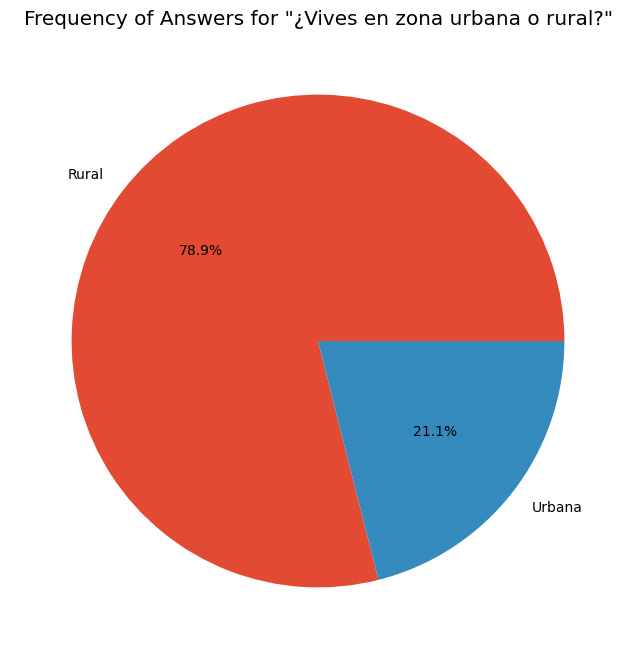

In [6]:
# Get the frequency of each unique value
Zona_freq = my_data["¿Vives en zona urbana o rural?"].value_counts()

style.use('ggplot')

# Create the pie chart
plt.figure(figsize=(10, 8))
Zona_freq.plot.pie(autopct='%1.1f%%')
plt.title('Frequency of Answers for "¿Vives en zona urbana o rural?"')
plt.ylabel('')  # Hide the y-axis label
plt.show()

In [ ]:
# Get the frequency of each unique value
genero_freq = my_data["¿Con qué género te identificas?"].value_counts()

style.use('ggplot')

# Create the pie chart
plt.figure(figsize=(10, 8))
genero_freq.plot.pie(autopct='%1.1f%%')
plt.title('Frequency of Answers for "¿Con qué género te identificas?"')
plt.ylabel('')  # Hide the y-axis label
plt.show()

In [ ]:
# Get the frequency of each unique value
enterarse_freq = my_data["¿Cómo te enteraste del programa?"].value_counts()

style.use('seaborn-v0_8')

# Create the pie chart
plt.figure(figsize=(10, 8))
enterarse_freq.plot.pie(autopct='%1.1f%%')
plt.title('Frequency of Answers for "¿Cómo te enteraste del programa?"')
plt.ylabel('')  # Hide the y-axis label
plt.show()

In [ ]:
# Get the frequency of each unique value
edad_estu_freq = my_data["¿A rango de edades enseñas?"].value_counts()
style.use('fivethirtyeight')

# Calculate the percentage for each age range
total = edad_estu_freq.sum()
percentages = (edad_estu_freq / total) * 100

# Create the bar chart and store the Axes object in ax
plt.figure(figsize=(12, 6))
ax = edad_estu_freq.plot(kind='bar')
plt.title('Frequency of Answers for "¿A rango de edades enseñas?"')
plt.xlabel('Rango de Edades')
plt.ylabel('Frequency')
plt.xticks(rotation=45)  # Rotate the x labels for better readability

# Annotate each bar with the percentage
for bar, percentage in zip(ax.patches, percentages):
    ax.annotate(f'{percentage:.1f}%', 
                (bar.get_x() + bar.get_width() / 2, bar.get_height()), 
                ha='center', va='bottom', fontsize=10, color='black')

plt.show()


In [ ]:
print(plt.style.available)
